In [113]:
# import numpy as np
from collections import defaultdict
from collections import Counter
import pymongo
from __future__ import division
import re
import matplotlib.pyplot as plt
from scipy import stats
import json
import pandas as pd
import itertools
import operator
import collections
import urllib2
from bs4 import BeautifulSoup
import seaborn as sns

def load_mongo_db():
    client = pymongo.MongoClient()
    db = client['searchx']
    return db

In [16]:
from functools import wraps
import errno
import os
import signal

class TimeoutError(Exception):
    pass

def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wraps(func)(wrapper)

    return decorator

In [3]:
db = load_mongo_db()
logs = db.logs
pages = db.pages

In [4]:
users = ["5b587dc6efcd5c0001cebd03", "5b587dc6efcd5c0001cebd03", "57533f7c483c14000662f391", "5d3a3b28376aea001a66782d",
"5c9e5a042b3c77001544e975", "5d26f5eb7aa0b0000138b4ba", "5d0a993c6e9965001aeafe67", "5c9162220791df0001366aa6","5d4fe8e3f20feb00190b643c",
"5d63bfff79f8dc0015af6de3","5a97081189de8200013eea9b","5952a1dc27f8fb00016213bb","58fd0de6d66f6400016dc0fd",
"5c742bf8ecf82a0015630ec1",
"5caf6c27b480520012eb741b",
"5d34437867a8ff0019dc0403",
"54a7c951fdf99b7cd759d23e",
"5c3f00de1580e9000122ecb5",
"5b0f27321e55760001b9a8a5","5c864b1bd9fe700001023b72","5cacf324ea201200013d7807","5b0c5ae5641b1200010ee49d","59308b35deea010001017c0e","5c28ef690091e40001ca5e99","5bcdf10432e46700016f8f80","595022904df2c40001bf85df","5877f454127d7700018b1bdf","5bf1de1556a321000106fae0","5b09bd6ae9270900013b82be","5cd0cdf9731ab00013a73906","59f8868e05d1d60001f1464d","5b82d4fda284bc000193094c","5d91a7c336017c00192a6755","5d8e3a178b0c840017736451","59bb884a3c45a10001ccc4f7","5d235fa4c9b2ee00190ed9af","58d0632c2fc72000011f8c57","5cf1b0f475b61a0001d00408","5be89ff4d153f500019aa86f","55f244e632af740012170458","5993020a5f49420001caf86b","5b0b1b5a9663ee0001456cec","5d8d0decf345720017634bc0","5d114bdc009d5e001ac94487","5d5ba6430ffa48001b458d64","5b6c3818f458f500013774a3","5d27b8fee5af0b00157f41a6","5c3fb34812dd430001d4b4d5","5d971ac046a93c0017005bf1","5b421b9ac2e3810001763252","57843b986475d400015a8e45","5d30eee5e7ca2e001bd4091b","5c1a32c91f191b0001ebe392","5c54b2e0cf1cd900018cf6a6","5bddad5e3dad0a0001e2d79b","5c676d436f250200012a04e8","5977e3867412f8000194e1fe","5d269f7442562200018babe6","5c5cad3e4ee81200018eafe2","5d404bc74db54a0001fecb92","56cb839cedf8da000c6df35b","5a69fb84eeef45000138d276"]

In [5]:
highiq_users = ['5c9e5a042b3c77001544e975',
 '5d26f5eb7aa0b0000138b4ba',
 '5d34437867a8ff0019dc0403',
 '58d0632c2fc72000011f8c57',
 '5be89ff4d153f500019aa86f',
 '55f244e632af740012170458',
 '5d8d0decf345720017634bc0',
 '5b6c3818f458f500013774a3',
 '5c3fb34812dd430001d4b4d5',
 '5d269f7442562200018babe6',
 '5d404bc74db54a0001fecb92']
lowiq_users = ['5b587dc6efcd5c0001cebd03', '5b587dc6efcd5c0001cebd03', '57533f7c483c14000662f391', '5d3a3b28376aea001a66782d', '5d0a993c6e9965001aeafe67', '5c9162220791df0001366aa6', '5d4fe8e3f20feb00190b643c', '5d63bfff79f8dc0015af6de3', '5a97081189de8200013eea9b', '5952a1dc27f8fb00016213bb', '58fd0de6d66f6400016dc0fd', '5c742bf8ecf82a0015630ec1', '5caf6c27b480520012eb741b', '54a7c951fdf99b7cd759d23e', '5c3f00de1580e9000122ecb5', '5b0f27321e55760001b9a8a5', '5c864b1bd9fe700001023b72', '5cacf324ea201200013d7807', '5b0c5ae5641b1200010ee49d', '59308b35deea010001017c0e', '5c28ef690091e40001ca5e99', '5bcdf10432e46700016f8f80', '595022904df2c40001bf85df', '5877f454127d7700018b1bdf','5bf1de1556a321000106fae0', '5b09bd6ae9270900013b82be', '5cd0cdf9731ab00013a73906', '59f8868e05d1d60001f1464d', '5b82d4fda284bc000193094c', '5d91a7c336017c00192a6755', '5d8e3a178b0c840017736451', '59bb884a3c45a10001ccc4f7', '5d235fa4c9b2ee00190ed9af', '5cf1b0f475b61a0001d00408', '5993020a5f49420001caf86b', '5b0b1b5a9663ee0001456cec', '5d114bdc009d5e001ac94487', '5d5ba6430ffa48001b458d64', '5d27b8fee5af0b00157f41a6', '5d971ac046a93c0017005bf1', '5b421b9ac2e3810001763252', '57843b986475d400015a8e45', '5d30eee5e7ca2e001bd4091b', '5c1a32c91f191b0001ebe392', '5c54b2e0cf1cd900018cf6a6', '5bddad5e3dad0a0001e2d79b', '5c676d436f250200012a04e8', '5977e3867412f8000194e1fe', '5c5cad3e4ee81200018eafe2', '56cb839cedf8da000c6df35b','5a69fb84eeef45000138d276']

In [70]:
def pages_per_session(logs, user, i):

    db_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i}
    unique_dom = 0.0
    serp_count = 0
    domlist = []
    for serp in np.unique([d['meta']['serpId'] for d in logs.find(db_query)]):
#         print(serp)
        if serp:
            serp_count += 1
            dom_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i, "meta.serpId": str(serp)}
            domlist.append([d['meta']['url'] for d in logs.find(dom_query)])
    return [item for sublist in domlist for item in sublist]


In [47]:
pages_per_session(logs,"5b587dc6efcd5c0001cebd03", "1")

[u'https://www.newhealthadvisor.org/how-does-anesthesia-work.html',
 u'https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/types-of-anesthesia-and-your-anesthesiologist',
 u'https://www.webmd.com/a-to-z-guides/what-is-general-anesthesia',
 u'https://www.drugs.com/cg/types-of-anesthesia.html',
 u'https://www.drugs.com/condition/anesthesia.html?page_number=5',
 u'https://www.asahq.org/whensecondscount/anesthesia-101/effects-of-anesthesia/']

In [109]:
def domains_per_session(logs, user, i):

    db_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i}
    unique_dom = 0.0
    serp_count = 0
    domlist = []
    for serp in np.unique([d['meta']['serpId'] for d in logs.find(db_query)]):
#         print(serp)
        if serp:
            serp_count += 1
            dom_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i, "meta.serpId": str(serp)}
            domlist.append([re.search('//(.+?)/',d['meta']['url']).group(1) for d in logs.find(dom_query)])
    return [item for sublist in domlist for item in sublist]


In [127]:
domain_stat_dict

{u'Anesthesia': {0: [[u'www.medicalnewstoday.com',
    u'www.newhealthadvisor.org',
    u'www.drugs.com'],
   [u'www.medicalnewstoday.com',
    u'www.newhealthadvisor.org',
    u'www.drugs.com'],
   [u'www.webmd.com',
    u'medical-dictionary.thefreedictionary.com',
    u'www.medicalnewstoday.com'],
   [u'en.wikipedia.org',
    u'www.asahq.org',
    u'www.medicalnewstoday.com',
    u'www.anesthesiaweb.org',
    u'www.medicalnewstoday.com',
    u'www.anesthesiaweb.org',
    u'www.everydayhealth.com',
    u'www.nigms.nih.gov',
    u'www.asahq.org'],
   [u'www.livescience.com',
    u'science.howstuffworks.com',
    u'www.medicalnewstoday.com',
    u'www.healthline.com',
    u'en.wikipedia.org'],
   [u'en.wikipedia.org'],
   [u'www.ncbi.nlm.nih.gov']],
  1: [[u'www.newhealthadvisor.org',
    u'www.hopkinsmedicine.org',
    u'www.webmd.com',
    u'www.drugs.com',
    u'www.drugs.com',
    u'www.asahq.org'],
   [u'www.newhealthadvisor.org',
    u'www.hopkinsmedicine.org',
    u'www.webmd.com

In [428]:
domain_stat_dict = {u'Anesthesia':{0:[], 1:[], 2: [], 3: []}, u'Depression':{0:[], 1:[], 2: [], 3: []},
                    u'Glycolysis': {0:[], 1:[], 2: [], 3: []}, u'Industrial biotechnology':{0:[], 1:[], 2: [], 3: []},
                  u'Qubit': {0:[], 1:[], 2: [], 3: []},u'Radioactive decay': {0:[], 1:[], 2: [], 3: []}, u'Religions': {0:[], 1:[], 2: [], 3: []}, 
                    u'Sedimentary rocks': {0:[], 1:[], 2: [], 3: []}, u'Urban water cycle': {0:[], 1:[], 2: [], 3: []},
                  u'Water quality chemistry': {0:[], 1:[], 2: [], 3: []}}
for count, user in enumerate(users):
    print(count)
    db_query = {"event": "SEARCH_QUERY", "userId": user, "meta.session": 0}
    queries =  [q["task"]['data']['topic']['title'] for q in logs.find(db_query)]
    user_dom = domains_per_session(logs, user, 0)
    domain_stat_dict[np.unique(queries)[0]][0].append(user_dom)
    for i in range(1,4):
        user_dom = domains_per_session(logs, user, str(i))
        domain_stat_dict[np.unique(queries)[0]][i].append(user_dom)
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [112]:
def count_func(domainlist):
    flatdomain = [item for sublist in domainlist for item in sublist]
    c = Counter(flatdomain)
    return c.most_common(1)[0]
    
tmp = {u'Anesthesia':[], u'Depression':[], u'Glycolysis': [],u'Industrial biotechnology':[],
                  u'Qubit': [],u'Radioactive decay': [], u'Religions': [], u'Sedimentary rocks': [], u'Urban water cycle': [],
                  u'Water quality chemistry': []}

for topic in domain_stat_dict.keys():
    for session in range(3):
        c = count_func(domain_stat_dict[topic][session])
        tmp[topic].append(c)
pd.DataFrame.from_dict(tmp, orient='index', columns=['sess_1', 'sess_2', 'sess_3'])





,sess_1,sess_2,sess_3
Religions,"(en.wikipedia.org, 3)","(en.wikipedia.org, 3)","(www.vaughns-1-pagers.com, 2)"
Sedimentary rocks,"(geology.com, 5)","(www.britannica.com, 2)","(en.wikipedia.org, 7)"
Radioactive decay,"(en.wikipedia.org, 3)","(en.wikipedia.org, 3)","(en.wikipedia.org, 7)"
Industrial biotechnology,"(www.bio.org, 3)","(en.wikipedia.org, 2)","(www.coursera.org, 2)"
Glycolysis,"(en.wikipedia.org, 9)","(en.wikipedia.org, 7)","(www.scienceprofonline.com, 3)"
Water quality chemistry,"(www.cdc.gov, 15)","(en.wikipedia.org, 12)","(en.wikipedia.org, 12)"
Qubit,"(en.wikipedia.org, 6)","(en.wikipedia.org, 10)","(en.wikipedia.org, 4)"
Anesthesia,"(www.medicalnewstoday.com, 6)","(www.drugs.com, 5)","(en.wikipedia.org, 5)"
Depression,"(www.mayoclinic.org, 5)","(www.verywellmind.com, 2)","(en.wikipedia.org, 3)"
Urban water cycle,"(www.sehinc.com, 7)","(en.wikipedia.org, 6)","(en.wikipedia.org, 6)"


In [434]:
def count_func_norm(domainlist):
    dicts =[]
    for item in domainlist:
        c = dict(Counter(item))
        total = sum(c.itervalues(), 0.0)
        c = {k: v / total for k, v in c.iteritems()}
        dicts.append(c)
#     print("dicts", dicts)
    x = {k:np.sum([d[k] for d in dicts if k in d ])/len(domainlist) for k in itertools.chain.from_iterable(dicts)}
#     print("x", x)
    sorted_x = collections.OrderedDict(sorted(x.items(), key=operator.itemgetter(1), reverse = True))
#     print(sorted_x)
    return sorted_x
#     return c.most_common(1)[0]
    
tmp = {u'Anesthesia':[], u'Depression':[], u'Glycolysis': [],u'Industrial biotechnology':[],
                  u'Qubit': [],u'Radioactive decay': [], u'Religions': [], u'Sedimentary rocks': [], u'Urban water cycle': [],
                  u'Water quality chemistry': []}

for topic in domain_stat_dict.keys():
#     print(topic)
    for session in range(4):
#         print(session)
#         print(domain_stat_dict[topic][session])
#         print(topic)
        c = count_func(domain_stat_dict[topic][session])
#         print(c.keys())
        tmp[topic].append([c.keys()[0], round(c.values()[0],2)])

# print(tmp)
pd.DataFrame.from_dict(tmp, orient='index', columns=['sess_1', 'sess_2', 'sess_3', 'sess_4'])

,sess_1,sess_2,sess_3,sess_4
Religions,"[en.wikipedia.org, 0.25]","[en.wikipedia.org, 0.25]","[www.vaughns-1-pagers.com, 0.22]","[www.dictionary.com, 0.33]"
Sedimentary rocks,"[geology.com, 0.37]","[www.britannica.com, 0.14]","[en.wikipedia.org, 0.39]","[en.wikipedia.org, 0.3]"
Radioactive decay,"[en.wikipedia.org, 0.21]","[en.wikipedia.org, 0.22]","[en.wikipedia.org, 0.33]","[en.wikipedia.org, 0.28]"
Industrial biotechnology,"[www.bio.org, 0.58]","[biomebioplastics.com, 0.21]","[en.wikipedia.org, 0.33]","[www.sciencedirect.com, 0.28]"
Glycolysis,"[en.wikipedia.org, 0.39]","[www.khanacademy.org, 0.15]","[www.thoughtco.com, 0.17]","[www.dbriers.com, 0.15]"
Water quality chemistry,"[www.cdc.gov, 0.33]","[en.wikipedia.org, 0.26]","[en.wikipedia.org, 0.28]","[en.wikipedia.org, 0.15]"
Qubit,"[en.wikipedia.org, 0.28]","[en.wikipedia.org, 0.43]","[en.wikipedia.org, 0.17]","[en.wikipedia.org, 0.24]"
Anesthesia,"[www.medicalnewstoday.com, 0.2]","[www.healthpages.org, 0.14]","[en.wikipedia.org, 0.23]","[www.webmd.com, 0.2]"
Depression,"[www.nhsinform.scot, 0.33]","[www.nhsinform.scot, 0.33]","[en.wikipedia.org, 0.36]","[psychcentral.com, 0.17]"
Urban water cycle,"[www.sehinc.com, 0.28]","[en.wikipedia.org, 0.27]","[en.wikipedia.org, 0.2]","[en.wikipedia.org, 0.13]"


In [432]:
domain_stat_dict[u'Glycolysis']

{0: [[u'en.wikipedia.org'],
  [u'en.wikipedia.org',
   u'www.thoughtco.com',
   u'laboratoryinfo.com',
   u'medical-dictionary.thefreedictionary.com',
   u'www.merriam-webster.com'],
  [u'en.wikipedia.org', u'www.thoughtco.com', u'www.khanacademy.org'],
  [u'microbiologyinfo.com', u'en.wikipedia.org', u'www.thoughtco.com'],
  [u'www.thoughtco.com', u'en.wikipedia.org', u'www.britannica.com'],
  [u'www.khanacademy.org',
   u'www.thoughtco.com',
   u'medical-dictionary.thefreedictionary.com'],
  [u'en.wikipedia.org',
   u'www.thoughtco.com',
   u'www.britannica.com',
   u'simple.wikipedia.org',
   u'en.wikipedia.org'],
  [u'www.khanacademy.org',
   u'www.merriam-webster.com',
   u'hyperphysics.phy-astr.gsu.edu',
   u'www.khanacademy.org',
   u'www.ncbi.nlm.nih.gov'],
  [u'www.khanacademy.org',
   u'www.khanacademy.org',
   u'www.thoughtco.com',
   u'en.wikipedia.org'],
  [u'en.wikipedia.org']],
 1: [[u'en.wikipedia.org',
   u'en.wikipedia.org',
   u'www.answers.com',
   u'www.reddit.com'

In [205]:
def count_func_topic(domainlist):
    flatdomain = [item for sublist in domainlist for item in sublist]
    flatdomain = [item for sublist in flatdomain for item in sublist]
    c = Counter(flatdomain)
    return c.most_common(5)
    
tmp = {u'Anesthesia':[], u'Depression':[], u'Glycolysis': [],u'Industrial biotechnology':[],
                  u'Qubit': [],u'Radioactive decay': [], u'Religions': [], u'Sedimentary rocks': [], u'Urban water cycle': [],
                  u'Water quality chemistry': []}

for topic in domain_stat_dict.keys():
#     for session in range(3):
#     print(topic)
    c = count_func_topic(domain_stat_dict[topic].values())
    tmp[topic] = c
pd.DataFrame.from_dict(tmp, orient='index', columns=['1', '2', '3', '4','5'])


,1,2,3,4,5
Religions,"(en.wikipedia.org, 7)","(www.vaughns-1-pagers.com, 2)","(www.uuworld.org, 2)","(www.everystudent.com, 2)","(www.britannica.com, 2)"
Sedimentary rocks,"(en.wikipedia.org, 12)","(geology.com, 7)","(www.britannica.com, 5)","(www.sciencekids.co.nz, 2)","(www.usgs.gov, 2)"
Radioactive decay,"(en.wikipedia.org, 13)","(science.howstuffworks.com, 6)","(www.britannica.com, 5)","(hps.org, 4)","(www.thoughtco.com, 4)"
Industrial biotechnology,"(en.wikipedia.org, 4)","(www.bio.org, 4)","(biomebioplastics.com, 3)","(www.coursera.org, 2)","(www.wisegeek.com, 1)"
Glycolysis,"(en.wikipedia.org, 19)","(www.thoughtco.com, 10)","(www.khanacademy.org, 10)","(microbiologyinfo.com, 6)","(laboratoryinfo.com, 3)"
Water quality chemistry,"(en.wikipedia.org, 32)","(www.cdc.gov, 23)","(www.epa.gov, 10)","(www.safewater.org, 7)","(www.wikihow.com, 5)"
Qubit,"(en.wikipedia.org, 20)","(www.reddit.com, 5)","(quantumcomputing.stackexchange.com, 4)","(www.sciencedirect.com, 3)","(www.rfwireless-world.com, 3)"
Anesthesia,"(en.wikipedia.org, 9)","(www.drugs.com, 9)","(www.asahq.org, 7)","(www.medicalnewstoday.com, 7)","(www.newhealthadvisor.org, 6)"
Depression,"(www.webmd.com, 7)","(www.mayoclinic.org, 6)","(en.wikipedia.org, 4)","(www.drugs.com, 4)","(www.nhsinform.scot, 3)"
Urban water cycle,"(en.wikipedia.org, 15)","(www.sehinc.com, 8)","(www.nationalgeographic.org, 5)","(ec.europa.eu, 4)","(ramboll.com, 4)"


In [433]:
def count_func_topic_norm(domainlist):
    dicts =[]
    co = 0
    for item in domainlist:
        for subitem in item:
            co+=1
            c = dict(Counter(subitem))
            total = sum(c.itervalues(), 0.0)
            c = {k: v /total  for k, v in c.iteritems()}
            dicts.append(c)
#     print("dicts", dicts)
    x = {k:np.sum([d[k] for d in dicts if k in d ])/co for k in itertools.chain.from_iterable(dicts)}
#     print("x", x)
    sorted_x = collections.OrderedDict(sorted(x.items(), key=operator.itemgetter(1), reverse = True))
#     print(sorted_x)
    return sorted_x

tmp = {u'Anesthesia':[], u'Depression':[], u'Glycolysis': [],u'Industrial biotechnology':[],
                  u'Qubit': [],u'Radioactive decay': [], u'Religions': [], u'Sedimentary rocks': [], u'Urban water cycle': [],
                  u'Water quality chemistry': []}

for topic in domain_stat_dict.keys():
#     for session in range(3):
#     print(topic)
#         print(session)
#         print(domain_stat_dict[topic][session])
#         print(topic)
    c = count_func_topic_norm(domain_stat_dict[topic].values())
    tmp[topic] = c.keys()[:5]
pd.DataFrame.from_dict(tmp, orient='index', columns=['1', '2', '3', '4','5'])

,1,2,3,4,5
Religions,en.wikipedia.org,www.dictionary.com,www.britannica.com,www.vaughns-1-pagers.com,www.uuworld.org
Sedimentary rocks,en.wikipedia.org,geology.com,www.britannica.com,www.usgs.gov,www.thefreedictionary.com
Radioactive decay,en.wikipedia.org,www.aplustopper.com,science.howstuffworks.com,www.answers.com,www.britannica.com
Industrial biotechnology,www.bio.org,en.wikipedia.org,biomebioplastics.com,www.sciencedirect.com,www.european-bioplastics.org
Glycolysis,en.wikipedia.org,www.khanacademy.org,www.thoughtco.com,microbiologyinfo.com,www.dbriers.com
Water quality chemistry,en.wikipedia.org,www.cdc.gov,www.epa.gov,www.safewater.org,www.hunker.com
Qubit,en.wikipedia.org,www.reddit.com,quantumcomputing.stackexchange.com,www.rfwireless-world.com,www.sciencedirect.com
Anesthesia,en.wikipedia.org,www.webmd.com,www.drugs.com,www.asahq.org,www.newhealthadvisor.org
Depression,www.nhsinform.scot,en.wikipedia.org,www.webmd.com,www.mayoclinic.org,www.drugs.com
Urban water cycle,en.wikipedia.org,www.sehinc.com,www.sciencedirect.com,www.researchgate.net,wiki.reformrivers.eu


In [54]:
import urllib
from bs4 import BeautifulSoup

url = "https://www.webmd.com/a-to-z-guides/what-is-general-anesthesia"
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.body.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

Please enable cookies.
Error
1010
Ray ID: 5316de6c0e8572e7 • 2019-11-06 11:53:45 UTC
Access denied
What happened?
The owner of this website (www.webmd.com) has banned your access based on your browser's signature (5316de6c0e8572e7-ua48).
Cloudflare Ray ID: 5316de6c0e8572e7
•
Your IP: 131.180.178.12
•
Performance & security by Cloudflare


## QUERY ANALYSIS

In [58]:
def get_topic_id(user):
    db_query = [ r["task"]['data']['topic']['id'] for r in logs.find({ "event" : "SEARCH_QUERY", "userId": user})] 
    with open('topics.json') as json_file:
        data = json.load(json_file)
        return(data[np.unique(db_query)[0]]['title'])
#     return (np.unique(db_query)[0])
def get_topic_terms(user):
    db_query = [ r["task"]['data']['topic']['id'] for r in logs.find({ "event" : "SEARCH_QUERY", "userId": user})] 

    with open('topics.json') as json_file:
        data = json.load(json_file)
        return(data[np.unique(db_query)[0]]['terms'])

In [59]:
def get_queries(logs, user):
    queries = {}
    db_query = {"event": "SEARCH_QUERY", "userId": user, "meta.session": 0}
    queries[0] =  [q["meta"]['query'] for q in logs.find(db_query)]
    for i in range(1,4):
        db_query = {"event": "SEARCH_QUERY", "userId": user, "meta.session": str(i)}
        queries[i] =  [q["meta"]['query'] for q in logs.find(db_query)]
    return queries

In [60]:
def mean_overlap_topic(user, sess):
    topic = str(get_topic_id(user))
    topic_terms = [t.lower() for t in topic.split()]

    queries = get_queries(logs, user)[sess]
    overlap = []
#     print(queries)
    if queries:
        for query in queries:

            query_terms = [q.lower() for q in query.split()]
            overlap.append(len(set.intersection(set(query_terms), set(topic_terms)))/len(query_terms))
#         print(overlap)
        return(np.mean(overlap))
    return 0

In [61]:
def mean_overlap_vocab(user, sess):
    vocab = get_topic_terms(user)
#     print(vocab)
    vocab_terms = [item for sublist in [str(t).split() for t in vocab] for item in sublist]
#     print(vocab_terms)
    queries = get_queries(logs, user)[sess]
    overlap = []
#     print(queries)
    if queries:
        for query in queries:

            query_terms = [q.lower() for q in query.split()]
            overlap.append(len(set.intersection(set(query_terms), set(vocab_terms)))/len(query_terms))
#         print(overlap)
        return(np.mean(overlap))
    return 0

In [62]:
def query_complexity(user, sess):
    queries = get_queries(logs, user)[sess]
    length = []
#     print(queries)
    if queries:
        for query in queries:

            query_terms = [str(q.lower()) for q in query.split()]
            characters = [item for sublist in [[char for char in word] for word in query_terms] for item in sublist]
            length.append(len(characters)/len(query_terms))
        return(np.mean(length))
    return 0

In [63]:
def query_entropy(user, sess):
    queries = get_queries(logs, user)[sess]
    terms = []
#     print(queries)
    if queries:
        for query in queries:

            query_terms = [str(q.lower()) for q in query.split()]
            terms.append(query_terms)
        terms = [item for sublist in terms for item in sublist]
        c = dict(Counter(terms))
        total = sum(c.itervalues(), 0.0)
        prob = [c[k]/total for k in c]
        return stats.entropy(prob)
#         return(np.mean(length))
    return 0

In [390]:
query_entropy("5be89ff4d153f500019aa86f",0)

{'processes': 1, 'municipal': 1, 'how': 1, 'make': 1, 'safe': 1, 'water': 2, 'to': 1, 'drinking': 1}
2.0431918705451206


0

In [117]:
topic_overlap_dict_high = {0: [], 1: [], 2: [], 3: []}
topic_overlap_dict_low = {0: [], 1: [], 2: [], 3: []}
for count, user in enumerate(highiq_users):
    print(count)
    for i in range(4):
        topic_overlap_dict_high[i].append(mean_overlap_topic(user, i))
for count, user in enumerate(lowiq_users):
    print(count)
    for i in range(4):
        topic_overlap_dict_low[i].append(mean_overlap_topic(user, i))

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [118]:
vocab_overlap_dict_high = {0: [], 1: [], 2: [], 3: []}
vocab_overlap_dict_low = {0: [], 1: [], 2: [], 3: []}
for count, user in enumerate(highiq_users):
    print(count)
    for i in range(4):
        vocab_overlap_dict_high[i].append(mean_overlap_vocab(user, i))
for count, user in enumerate(lowiq_users):
    print(count)
    for i in range(4):
        vocab_overlap_dict_low[i].append(mean_overlap_vocab(user, i))

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [119]:
query_complex_dict_high = {0: [], 1: [], 2: [], 3: []}
query_complex_dict_low = {0: [], 1: [], 2: [], 3: []}
for count, user in enumerate(highiq_users):
    print(count)
    for i in range(4):
        query_complex_dict_high[i].append(query_complexity(user, i))
for count, user in enumerate(lowiq_users):
    print(count)
    for i in range(4):
        query_complex_dict_low[i].append(query_complexity(user, i))

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [120]:
query_entropy_dict_high = {0: [], 1: [], 2: [], 3: []}
query_entropy_dict_low = {0: [], 1: [], 2: [], 3: []}
for count, user in enumerate(highiq_users):
    print(count)
    for i in range(4):
        query_entropy_dict_high[i].append(query_entropy(user, i))
for count, user in enumerate(lowiq_users):
    print(count)
    for i in range(4):
        query_entropy_dict_low[i].append(query_entropy(user, i))

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


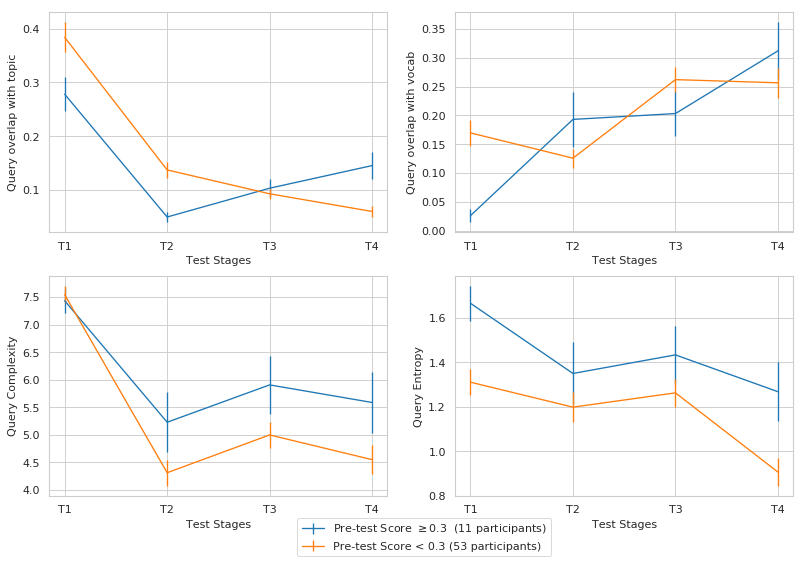

In [154]:
import seaborn as sns
import matplotlib.ticker as ticker


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4) 

plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
hq_error = [stats.sem(topic_overlap_dict_high[k])/2 for k in np.sort(topic_overlap_dict_high.keys())][:4]
lq_error = [stats.sem(topic_overlap_dict_low[k])/2 for k in np.sort(topic_overlap_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(topic_overlap_dict_high[k]) for k in np.sort(topic_overlap_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(topic_overlap_dict_low[k]) for k in np.sort(topic_overlap_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Query overlap with topic", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
plt.yticks(fontsize=10)
# plt.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
# plt.legend((line1, line2), ("PTS >= 3 (11 users)", "PTS <3 (53 users)"), loc='upper right')
plt.legend((line1, line2), ("Pre-test Score $\geq 0.3$  (11 participants)", "Pre-test Score < 0.3 (53 participants)"),
           bbox_to_anchor=(1.5,-1.5), loc="lower right",   fontsize= 10  )
#                 bbox_transform=fig.transFigure, ncol=3, prop={'size': 22})

plt.subplot(2,2,2)
hq_error = [stats.sem(vocab_overlap_dict_high[k])/2 for k in np.sort(vocab_overlap_dict_high.keys())][:4]
lq_error = [stats.sem(vocab_overlap_dict_low[k])/2 for k in np.sort(vocab_overlap_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(vocab_overlap_dict_high[k]) for k in np.sort(vocab_overlap_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(vocab_overlap_dict_low[k]) for k in np.sort(vocab_overlap_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Query overlap with vocab", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
plt.yticks(fontsize=10)
# plt.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
# plt.legend((line1, line2), ("PTS >= 3 (11 users)", "PTS <3 (53 users)"), loc='upper right')
# plt.legend((line1, line2), ("Pre-test Score $\geq 0.3$  (11 participants)", "Pre-test Score < 0.3 (53 participants)"),
#            bbox_to_anchor=(0,-0.02), loc="lower right", )
#                 bbox_transform=fig.transFigure, ncol=3, prop={'size': 22})

plt.subplot(2,2,3)
hq_error = [stats.sem(query_complex_dict_high[k])/2 for k in np.sort(query_complex_dict_high.keys())][:4]
lq_error = [stats.sem(query_complex_dict_low[k])/2 for k in np.sort(query_complex_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(query_complex_dict_high[k]) for k in np.sort(query_complex_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(query_complex_dict_low[k]) for k in np.sort(query_complex_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Query Complexity", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(2,2,4)
hq_error = [stats.sem(query_entropy_dict_high[k])/2 for k in np.sort(query_entropy_dict_high.keys())][:4]
lq_error = [stats.sem(query_entropy_dict_low[k])/2 for k in np.sort(query_entropy_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(query_entropy_dict_high[k]) for k in np.sort(query_entropy_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(query_entropy_dict_low[k]) for k in np.sort(query_entropy_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Query Entropy", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("querystat.pdf")

## Page Analysis

In [6]:
def pages_per_session(logs, user, i):

    db_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i}
    unique_dom = 0.0
    serp_count = 0
    domlist = []
    for serp in np.unique([d['meta']['serpId'] for d in logs.find(db_query)]):
#         print(serp)
        if serp:
            serp_count += 1
            dom_query = {"event": "SEARCHRESULT_CLICK_URL", "userId": user, "meta.session": i, "meta.serpId": str(serp)}
            domlist.append([d['meta']['url'] for d in logs.find(dom_query)])
    return np.unique([item for sublist in domlist for item in sublist])


In [42]:
pages_per_session(logs, user, "3")

array([u'https://pubchem.ncbi.nlm.nih.gov/compound/nitrate'], dtype='<U49')

In [107]:
import httplib

@timeout(10)
def beautiful_titletext(site):
#     site = 'https://www.webmd.com/a-to-z-guides/what-is-general-anesthesia'
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}
#            'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
#            'Accept-Encoding': 'none',
#            'Accept-Language': 'en-US,en;q=0.8',
#            'Connection': 'keep-alive'}

    req = urllib2.Request(site, headers=hdr)
    error = ''
    try:
        page = urllib2.urlopen(req)
    except urllib2.HTTPError as e:
        error_desc = httplib.responses.get(e.code, '')
        error = 'HTTP Error: ' + str(e.code) 
    except urllib2.URLError as e:
        error = 'URL Error: ' + e.reason[1] 
    except Exception as e:
        error = 'Unknown Error: ' + str(e)

    if error:
        print(error)
        return [], []
    
    try:
        html = page.read()
        soup = BeautifulSoup(html)
    except Exception as e:
        error = 'Unknown Error: ' + str(e)
    if error:
        print(error)
        return [], []
    for script in soup(["script", "style"]):
        script.extract()    # rip it out
#     print("here 1")
    # get text
    # text = soup.find_all('p')
    # print(text)
    table = soup.find_all('p')
    text = [x.text for x in table]
    title_table = soup.find_all('title')
    title_text = [x.text for x in title_table]
    return title_text, text
# text = [t for t in soup.find_all(text=True) if t.parent.name in whitelist]
# print(text)
# break into lines and remove leading and trailing space on each


In [48]:
def avg_para_len(site_text):
#     print(site_text)
    num_para = len(site_text)
    len_list = [len(para.split()) for para in site_text]
#     print(np.sum(len_list)/num_para)
    return(np.sum(len_list)/num_para)
    
#     return para_len

In [83]:
def keyword_in_title(site_title, user):
    vocab = get_topic_terms(user)
#     print(vocab)
    vocab_terms = [item for sublist in [str(t).split() for t in vocab] for item in sublist]
    title = site_title[0].split()
    title = [str(t) for t in title if t.isalpha()]
#     print(title)
#     print(vocab_terms)
    if len(set.intersection(set(title), set(vocab_terms)))> 0:
           return 1
    else:
           return 0
    

In [86]:
def keyword_density(site_text, user):
    vocab = get_topic_terms(user)
#     print(vocab)
    vocab_terms = [item for sublist in [str(t).split() for t in vocab] for item in sublist]
    tot_words = np.sum([len(para.split()) for para in site_text])
    all_words = [item for sublist in [para.split() for para in site_text] for item in sublist]
    return len(set.intersection(set(all_words), set(vocab_terms)))/tot_words
    
#     return /tot_words

In [94]:
doc_length_dict_high = {0: [], 1: [], 2: [], 3: []}
doc_length_dict_low = {0: [], 1: [], 2: [], 3: []}

avg_para_dict_high = {0: [], 1: [], 2: [], 3: []}
avg_para_dict_low = {0: [], 1: [], 2: [], 3: []}

key_title_dict_high = {0: [], 1: [], 2: [], 3: []}
key_title_dict_low = {0: [], 1: [], 2: [], 3: []}

key_dense_dict_high = {0: [], 1: [], 2: [], 3: []}
key_dense_dict_low = {0: [], 1: [], 2: [], 3: []}


for count, user in enumerate(highiq_users):
    print(count)
    for i in range(4):
        if i == 0:
            pages = pages_per_session(logs, user, i)
        else:
            pages = pages_per_session(logs, user, str(i))
#         print(pages)
        doclen = []
        avgpara = []
        keytitle = []
        keydense = []
        for site in pages:
#             print(site, site_title)
            site_title, site_text = beautiful_titletext(site)
            if(len(site_text)>0):
                doclen.append(len(site_text))
                avgpara.append(avg_para_len(site_text))
                keydense.append(keyword_density(site_text,user))
            if (len(site_title)>0):
                keytitle.append(keyword_in_title(site_title, user))
        if len(doclen)>0:
            doc_length_dict_high[i].append(np.mean(doclen))
        if len(avgpara)>0:
            avg_para_dict_high[i].append(np.mean(avgpara))
        if len(keytitle)>0:
            key_title_dict_high[i].append(np.mean(keytitle))
        if len(keydense)>0:
            key_dense_dict_high[i].append(np.mean(keydense))




0
1
2
3
Unknown Error: Timer expired
4
Unknown Error: Timer expired
5
6
7
8
9
Unknown Error: Timer expired
Unknown Error: Timer expired
10


In [108]:
for count, user in enumerate(lowiq_users):
    print(count)
    for i in range(4):
        if i == 0:
            pages = pages_per_session(logs, user, i)
        else:
            pages = pages_per_session(logs, user, str(i))
#         print(pages)
        doclen = []
        avgpara = []
        keytitle = []
        keydense = []
        for site in pages:
#             print(site, site_title)
            site_title, site_text = beautiful_titletext(site)
            if(len(site_text)>0):
                doclen.append(len(site_text))
                avgpara.append(avg_para_len(site_text))
                keydense.append(keyword_density(site_text,user))
            if (len(site_title)>0):
                keytitle.append(keyword_in_title(site_title, user))
        if len(doclen)>0:
            doc_length_dict_low[i].append(np.mean(doclen))
        if len(avgpara)>0:
            avg_para_dict_low[i].append(np.mean(avgpara))
        if len(keytitle)>0:
            key_title_dict_low[i].append(np.mean(keytitle))
        if len(keydense)>0:
            key_dense_dict_low[i].append(np.mean(keydense))


0
HTTP Error: 302
1
HTTP Error: 302
2
Unknown Error: Timer expired
Unknown Error: Timer expired
Unknown Error: Timer expired
Unknown Error: Timer expired
3
4
Unknown Error: Timer expired
Unknown Error: Timer expired
5
6
7
8
9
10
HTTP Error: 403
HTTP Error: 302
Unknown Error: Timer expired
Unknown Error: Timer expired
11
12
13
Unknown Error: Timer expired
14
15
16
17
18
19
20
21
22
23
24
HTTP Error: 403
Unknown Error: Timer expired
25
26
Unknown Error: Timer expired
27
28
Unknown Error: Timer expired
HTTP Error: 404
29
30
31
HTTP Error: 410
32
33
34
35
36
Unknown Error: Timer expired
37
URL Error: Error
38
HTTP Error: 404
39
40
41
Unknown Error: Timer expired
Unknown Error: Timer expired
42
43
Unknown Error: Timer expired
44
45
HTTP Error: 403
46
47
48
Unknown Error: Timer expired
49
50


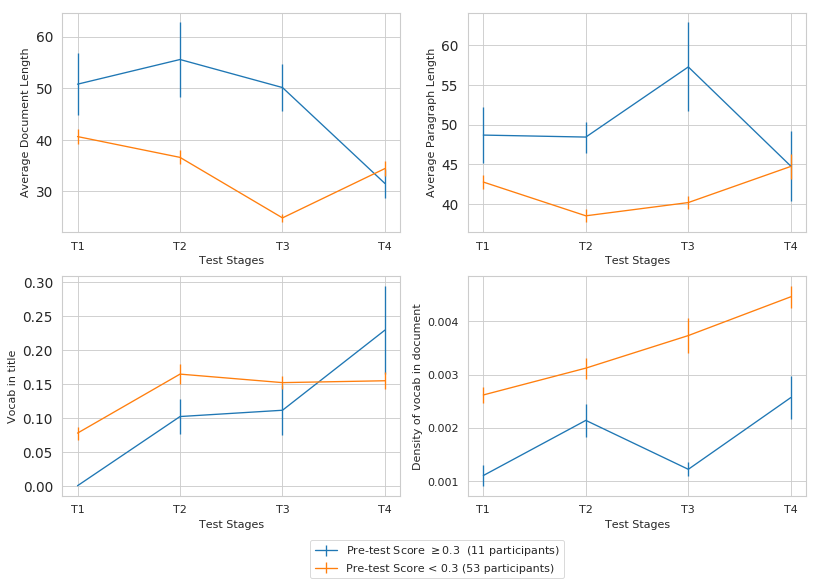

In [156]:

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4) 

plt.figure(figsize=(12,8), dpi=80)
plt.subplot(2,2,1)
hq_error = [stats.sem(doc_length_dict_high[k])/2 for k in np.sort(doc_length_dict_high.keys())][:4]
lq_error = [stats.sem(doc_length_dict_low[k])/2 for k in np.sort(doc_length_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(doc_length_dict_high[k]) for k in np.sort(doc_length_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(doc_length_dict_low[k]) for k in np.sort(doc_length_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Average Document Length", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
# plt.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
# plt.legend((line1, line2), ("PTS >= 3 (11 users)", "PTS <3 (53 users)"), loc='upper right')
plt.legend((line1, line2), ("Pre-test Score $\geq 0.3$  (11 participants)", "Pre-test Score < 0.3 (53 participants)"),
           bbox_to_anchor=(1.5,-1.6), loc="lower right",  fontsize=10 )

plt.subplot(2,2,2)
hq_error = [stats.sem(avg_para_dict_high[k])/2 for k in np.sort(avg_para_dict_high.keys())][:4]
lq_error = [stats.sem(avg_para_dict_low[k])/2 for k in np.sort(avg_para_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(avg_para_dict_high[k]) for k in np.sort(avg_para_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(avg_para_dict_low[k]) for k in np.sort(avg_para_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Average Paragraph Length", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)

plt.subplot(2,2,3)
hq_error = [stats.sem(key_title_dict_high[k])/2 for k in np.sort(key_title_dict_high.keys())][:4]
lq_error = [stats.sem(key_title_dict_low[k])/2 for k in np.sort(key_title_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(key_title_dict_high[k]) for k in np.sort(key_title_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(key_title_dict_low[k]) for k in np.sort(key_title_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Vocab in title", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)


plt.subplot(2,2,4)
hq_error = [stats.sem(key_dense_dict_high[k])/2 for k in np.sort(key_dense_dict_high.keys())][:4]
lq_error = [stats.sem(key_dense_dict_low[k])/2 for k in np.sort(key_dense_dict_low.keys())][:4]
line1 = plt.errorbar( np.arange(4),[np.mean(key_dense_dict_high[k]) for k in np.sort(key_dense_dict_high.keys())][:4], hq_error )
line2 = plt.errorbar(np.arange(4), [np.mean(key_dense_dict_low[k]) for k in np.sort(key_dense_dict_low.keys())][:4],lq_error )
# plt.legend(loc='lower left', frameon=False)
plt.ylabel("Density of vocab in document", fontsize=10)
plt.xlabel("Test Stages", fontsize=10)
plt.xticks(np.arange(4), ('T1', 'T2', 'T3', 'T4'), fontsize=10)
plt.yticks(fontsize = 10)
plt.savefig("docstat.pdf")